# Regression and Other Stories: Elections Economy

*Note*: This code in this notebook follows the book order of presentation

In [1]:
import arviz as az
from bambi import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

*Insert Graphing the Bread and Peace Model*

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat"
hibbs = pd.read_csv(data, delimiter=" ")
hibbs

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


### Graphing the bread and peace model

In [3]:
# TODO

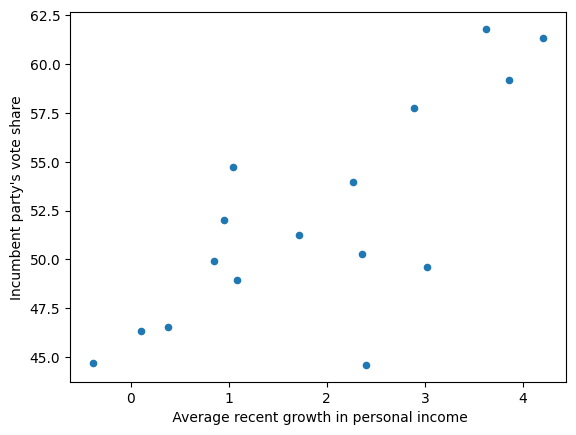

In [4]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

### Linear regression

In [10]:
model = Model(formula = 'vote ~ growth', data=hibbs)
M1 = model.fit(samples=1000, chains=4)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, growth]


/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [ ]:
? model.fit

Signature:
model.fit(
    draws=1000,
    tune=1000,
    discard_tuned_samples=True,
    omit_offsets=True,
    include_mean=None,
    include_response_params=False,
    inference_method='mcmc',
    init='auto',
    n_init=50000,
    chains=None,
    cores=None,
    random_seed=None,
    **kwargs,
)
Docstring:
Fit the model using PyMC

Parameters
----------
draws: int
    The number of samples to draw from the posterior distribution. Defaults to 1000.
tune : int
    Number of iterations to tune. Defaults to 1000. Samplers adjust the step sizes,
    scalings or similar during tuning. These tuning samples are be drawn in addition to the
    number specified in the `draws` argument, and will be discarded unless
    `discard_tuned_samples` is set to `False`.
discard_tuned_samples : bool
    Whether to discard posterior samples of the tune interval. Defaults to `True`.
omit_offsets : bool
    Omits offset terms in the `InferenceData` object returned when the model includes
    group specifi

In [11]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(M1, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
sigma,3.90,0.52
Intercept,46.29,1.12
growth,3.06,0.48


In [36]:
# TODO Add prior_summary()
M1.posterior

<xarray.Dataset> Size: 104kB
Dimensions:    (chain: 4, draw: 1000)
Coordinates:
  * chain      (chain) int64 32B 0 1 2 3
  * draw       (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    sigma      (chain, draw) float64 32kB 3.252 3.252 3.78 ... 6.045 5.802 2.321
    Intercept  (chain, draw) float64 32kB 48.3 48.3 45.11 ... 45.1 45.04 47.3
    growth     (chain, draw) float64 32kB 2.604 2.604 2.647 ... 3.107 2.673
Attributes:
    created_at:                  2025-04-30T07:09:07.018682+00:00
    arviz_version:               0.21.0
    inference_library:           pymc
    inference_library_version:   5.21.1
    sampling_time:               0.4275047779083252
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.15.0

In [ ]:
# TODO Add more details summary()

### Posterior interval
In Bambi and ArviZ the summary method gives us the posterior interval as well as many of the diagnostics

In [12]:
az.summary(M1, round_to=1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,4.0,0.8,2.6,5.5,0.0,0.0,2939.2,2500.7,1.0
Intercept,46.3,1.8,42.7,49.6,0.0,0.0,3534.7,2581.4,1.0
growth,3.0,0.8,1.6,4.4,0.0,0.0,3646.3,2795.9,1.0


### Bonus: Show ordinary least squares regression

In [14]:
results = smf.ols('vote ~ growth', data=hibbs).fit()
results.summary()

/Users/kevinkyhalim/ML_repo/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   vote   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           0.000610
Time:                        15:17:24   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2476      1.622     28.514      0.000      42.769      49.726
growth         3.0605      0.696      4.396      0.001       1.567       4.554
==============================================================================
Omnibus:                        5.392   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                2.828
Skew:                          -0.961   Prob(JB):                        0.243
Kurtosis:                       3.738   Cond. No.                         4.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot Regression Line


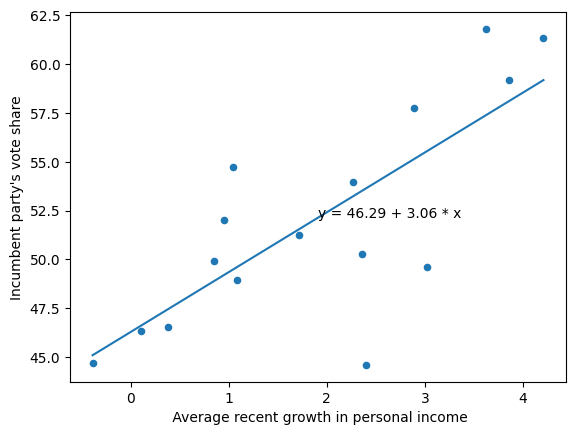

In [34]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept", "Median"]
b_hat = coefs.loc["growth", "Median"]

# Generate x range
growth_domain = np.linspace(hibbs["growth"].min(), hibbs["growth"].max(), 100)

# Plot Line
ax.plot(growth_domain, a_hat+b_hat*growth_domain)

# Add formula
growth_midpoint = growth_domain.mean()
ax.text(growth_midpoint, a_hat+b_hat*growth_midpoint,
       f"y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x");


# Add scatter plot
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

### Plot prediction given 2% growth

In [ ]:
# TODO

## Illustrate computations

In [16]:
# In Bambi the results are returned as InferenceData objects
# which are already in an easily selectable format
M1

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [37]:
a = M1.posterior["Intercept"].values.flatten()
b = M1.posterior["growth"].values.flatten()
sigma = M1.posterior["sigma"].values.flatten()

# Since bambi can run multiple chains and draws the number of simulations
# is chains* draws
n_sims = M1.posterior.coords["chain"].shape[0] * M1.posterior.coords["draw"].shape[0]

### Median 

In [38]:
M1.posterior.median()

<xarray.Dataset> Size: 24B
Dimensions:    ()
Data variables:
    sigma      float64 8B 3.901
    Intercept  float64 8B 46.29
    growth     float64 8B 3.057

### Mean Absolute Deviation (MAD_SD) 
TODO: Right now is standard deviation. Need to change it to MAD

In [39]:
M1.posterior.std()

<xarray.Dataset> Size: 24B
Dimensions:    ()
Data variables:
    sigma      float64 8B 0.8254
    Intercept  float64 8B 1.796
    growth     float64 8B 0.7505

In [40]:
a = M1.posterior["Intercept"].values.flatten()
b = M1.posterior["growth"].values.flatten()
z = a/b
np.median(z)

np.float64(15.117436376255657)

In [41]:
stats.median_abs_deviation(z)

np.float64(2.6530154872368223)

### Point prediction given 2% growth

TODO: Verify this is true
Bambi does not have a way to make predictions given a data frame of independent variables

### Alternative way to compute the point prediction

In [42]:
new = 2.0
a_hat = coefs.loc["Intercept", "Median"]
b_hat = coefs.loc["growth", "Median"]
y_point_pred = a_hat + b_hat*new
y_point_pred

np.float64(52.41)

### Uncertainty in prediction given 2% growth

TODO: Verify this is true
Bambi does not have a way to make predictions given a data frame of independent variables

### Do same computation “manually”

In [43]:
a = M1.posterior["Intercept"].values.flatten()
b = M1.posterior["growth"].values.flatten()
y_linpred = a + b*new
y_linpred

array([53.50758451, 53.50758451, 50.40848476, ..., 51.49838051,
       51.25265227, 52.64646439], shape=(4000,))

### Predictive uncertainty
With a PyMC3 backend we can use the posterior predictive method to do this

TODO: Verify this is true
Bambi does not have a way to make posterior predictive given a data frame of independent variables


### Predictive uncertainty manually

In [44]:
sigma = M1.posterior["sigma"].values.flatten()
n_sims = sigma.shape
y_pred = a+b*new + stats.norm(0, sigma).rvs(n_sims)

#### Summarize Predictions

In [46]:
Median = np.median(y_pred)
MAD_SD = stats.median_abs_deviation(y_pred)
win_prob = (y_pred > 50).mean()
#median, MAD_SD, win_prob

(f"Predicted Clinton percentage of 2-party vote: {np.round(Median,1)}"
f" with s.e. {np.round(MAD_SD, 1)}"
f"\nPr (Clinton win) = {np.round(win_prob, 2)}")

'Predicted Clinton percentage of 2-party vote: 52.4 with s.e. 2.8\nPr (Clinton win) = 0.72'

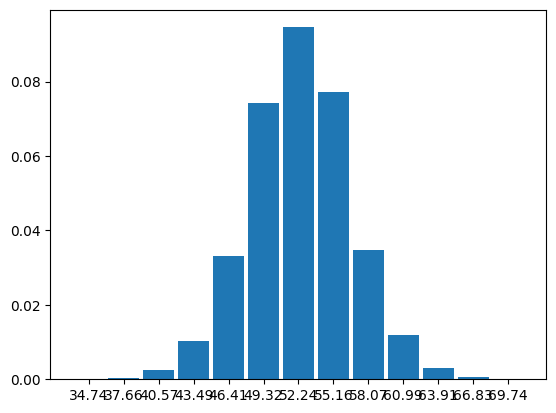

In [47]:
az.plot_dist(y_pred, kind="hist");

### Predict for many new values

In [26]:
# TODO: Figure out if there's a simple way in bambi to set pymc3 style
# Shared value to allow for input vars to be changed afterwards

### Plots

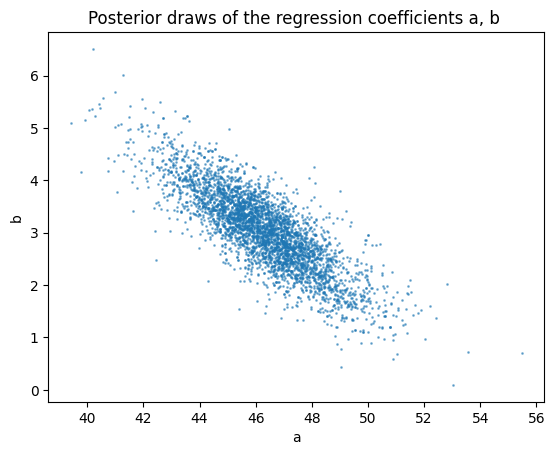

In [27]:
fig, ax = plt.subplots()

ax.scatter(a, b, s=1, alpha=.5)
ax.set_title("Posterior draws of the regression coefficients a, b ")
ax.set_xlabel("a")
ax.set_ylabel("b");

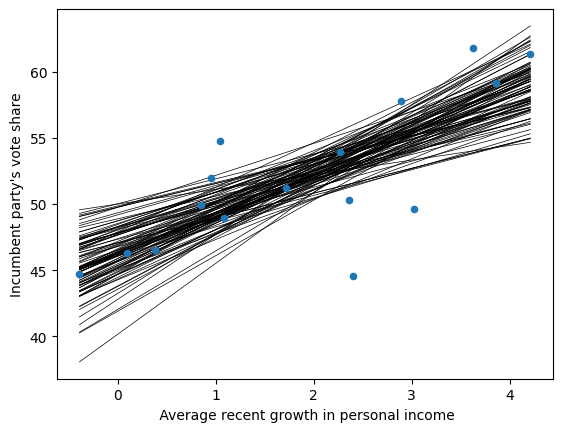

In [49]:
# TODO: Change the plot from points to years
fig, ax = plt.subplots()

a_hat = coefs.loc["Intercept", "Median"]
b_hat = coefs.loc["growth", "Median"]

# Generate x range
growth_domain = np.linspace(hibbs["growth"].min(), hibbs["growth"].max(), 100)


# Plot Line
for i in range(100):
    a_i, b_i = a[i], b[i]
    ax.plot(growth_domain, a_i+b_i*growth_domain, c="black",
            linewidth=.5,
            zorder=1)

# Add scatter plot
hibbs.plot(kind="scatter", x="growth", y="vote", ax=ax, zorder=2)
ax.set_xlabel(" Average recent growth in personal income")
ax.set_ylabel("Incumbent party's vote share");

### Add more uncertainty

In [50]:
x = stats.norm(2.0, 0.3).rvs(n_sims)
sigma = M1.posterior["sigma"].values.flatten()
n_sims = sigma.shape
y_pred = a+b*new + stats.norm(0, sigma).rvs(n_sims)

Median = np.median(y_pred)
MAD_SD = stats.median_abs_deviation(y_pred)
win_prob = (y_pred > 50).mean()
Median, MAD_SD, win_prob

(f"Predicted Clinton percentage of 2-party vote: {np.round(Median,1)}"
f" with s.e. {np.round(MAD_SD, 1)}"
f" Pr (Clinton win) = {np.round(win_prob, 2)}")

'Predicted Clinton percentage of 2-party vote: 52.3 with s.e. 2.8 Pr (Clinton win) = 0.71'

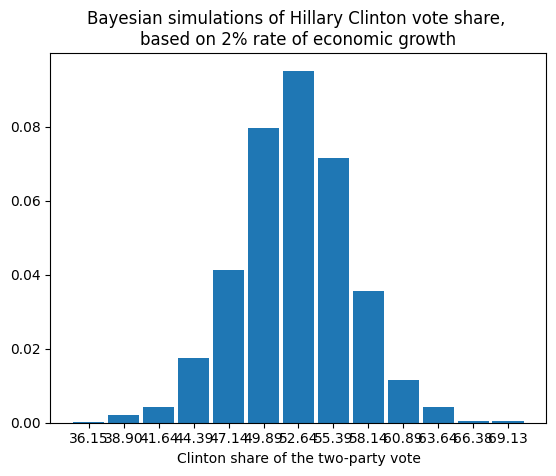

In [51]:
ax = az.plot_dist(y_pred, kind="hist")
ax.set_xlabel("Clinton share of the two-party vote")
ax.set_ylabel("")
ax.set_title("Bayesian simulations of Hillary Clinton vote share, \nbased on 2% rate of economic growth");

### Bayesian inference and prior information

Combining information from a forecast and a poll. Hypothetical forecast and data.

In [53]:
theta_hat_prior = 0.524
se_prior = 0.041

n = 400
y = 190
theta_hat_data = y/n
se_data = np.sqrt((y/n)*(1-y/n)/n)

theta_hat_bayes = (theta_hat_prior / se_prior**2 + theta_hat_data / se_data**2) / (1 / se_prior**2 + 1 / se_data**2)

se_bayes = np.sqrt(1/(1/se_prior**2 + 1/se_data**2))

In [54]:
se_data = .075
print((theta_hat_prior/se_prior**2 + theta_hat_data/se_data**2)/(1/se_prior**2 + 1/se_data**2))

0.5127258417738846
